This notebook will develop a function to read wideband frequency response output from Echoview and adjust the frequency bins to resample at a given frequency range points.

In [1]:
import csv
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Write function to read file

In [52]:
def read_widebandfrequencyresponse(fname,header = 9, extracols = 1):
    """"Opens a file created by the wideband frequency response graph 
    export file. Returns a matrix containing the frequency array and 
    the volume backscattering coefficient.
    
    Parameters:
    fname: filename with path of EV export from wideband frequency response plot - graph- export
    header: the number of lines in the header information (the default is 9.)
    extracols: The columns without backscatter information. Typically information on fileset. (The default is 1.)
    
    Returns:
    freqs: array of frequencies
    sv: array of volume backscatter coefficient values
    """
    
    freq_response_csv = pd.read_csv(fname,header=header)
    freq_response = freq_response_csv.to_numpy()
    # Remove fileset column
    freq_resp = freq_response[:,:-2]
    
    #Calculate volume backscatter coefficient.
    freqs = freq_resp[:,0]
    sv = 10**(freq_resp[:,1:]/10)
    return freqs, sv

# Run function

In [53]:
fname = 'D:/GLIDER2018/Echosounder/EVexport/Wideband_frequency_response_28AM.csv'
freqs, sv = read_widebandfrequencyresponse(fname, extracols = 2)

# Plot

Text(0, 0.5, 'sv ($m_{-1}$)')

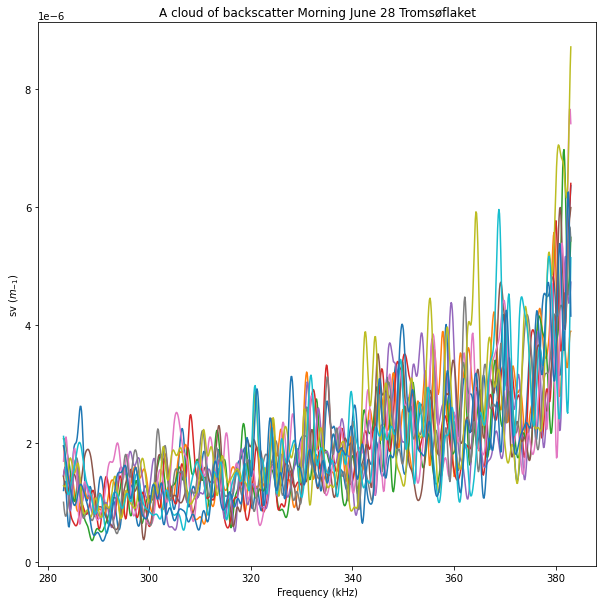

In [55]:
fig=plt.figure(figsize=(10, 10),facecolor='w', edgecolor='k')
plt.plot(freqs,sv)
plt.title('A cloud of backscatter Morning June 28 Tromsøflaket')
plt.xlabel('Frequency (kHz)')
plt.ylabel('sv ($m_{-1}$)')